In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

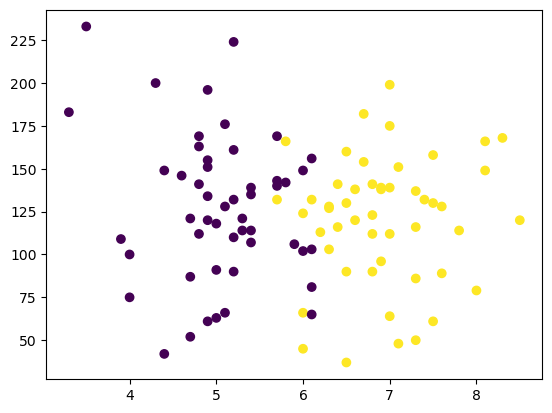

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
X.shape

(100, 2)

In [14]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [15]:
Y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
18,4.0,100.0
82,6.5,37.0
68,4.0,75.0
61,7.3,137.0
39,4.6,146.0
...,...,...
1,5.9,106.0
98,6.3,103.0
96,4.4,42.0
12,5.4,139.0


In [20]:
Y_train

18    0
82    1
68    0
61    1
39    0
     ..
1     0
98    1
96    0
12    0
29    1
Name: placement, Length: 90, dtype: int64

In [21]:
X_test

,cgpa,iq
58,8.0,79.0
34,4.8,163.0
86,5.1,128.0
33,6.0,149.0
76,4.9,155.0
56,6.1,65.0
65,8.1,166.0
70,6.3,127.0
92,5.2,110.0
43,6.8,141.0


In [22]:
Y_test

58    1
34    0
86    0
33    0
76    0
56    0
65    1
70    1
92    0
43    1
Name: placement, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[-1.73873416e+00, -5.70460128e-01],
       [ 4.61576222e-01, -2.12925961e+00],
       [-1.73873416e+00, -1.18903135e+00],
       [ 1.16567554e+00,  3.45025282e-01],
       [-1.21065967e+00,  5.67710922e-01],
       [-2.42523100e-01,  4.93482376e-01],
       [ 9.89650714e-01,  6.91425167e-01],
       [ 1.86977487e+00,  6.41939469e-01],
       [-1.12264725e+00, -8.92117164e-01],
       [ 2.15141460e-02,  2.33682462e-02],
       [-2.42523100e-01,  1.13679645e+00],
       [-5.94572761e-01, -5.08603006e-02],
       [-1.12264725e+00, -5.08603006e-02],
       [-9.46622422e-01,  1.80485337e+00],
       [-6.82585176e-01, -8.17888617e-01],
       [ 7.25613468e-01, -8.17888617e-01],
       [ 7.25613468e-01, -2.73545941e-01],
       [-7.70597592e-01, -1.41171699e+00],
       [-1.03463484e+00,  1.13679645e+00],
       [-9.46622422e-01,  6.91425167e-01],
       [ 1.16567554e+00, -9.16860013e-01],
       [-5.06560346e-01, -2.24060243e-01],
       [ 1.09526561e-01,  8.15139412e-01],
       [ 2.

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 1.78176245, -1.09005996],
       [-1.03463484,  0.98833935],
       [-0.77059759,  0.12233964],
       [ 0.02151415,  0.64193947],
       [-0.94662242,  0.79039656],
       [ 0.10952656, -1.43645984],
       [ 1.86977487,  1.0625679 ],
       [ 0.28555139,  0.09759679],
       [-0.68258518, -0.32303164],
       [ 0.72561347,  0.44399668]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [35]:
Y_pred = clf.predict(X_test)

In [34]:
Y_test

58    1
34    0
86    0
33    0
76    0
56    0
65    1
70    1
92    0
43    1
Name: placement, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(Y_test,Y_pred)

0.8

In [40]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 365.7 kB/s eta 0:00:04
   - ---------------------------------

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

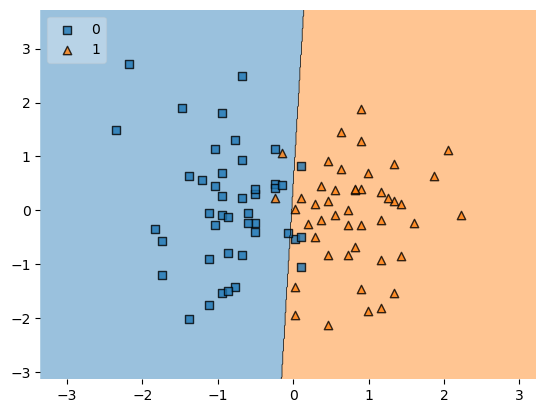

In [43]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl','wb'))